<a href="https://colab.research.google.com/github/ChiNonsoHenry16/ChiNonsoHenry16/blob/main/Malware_Spread_Simulator_with_100_Nodes_%2B_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE: Using Epidemic Multi-agent Synthetic Datasets for Predictions in Communication Networks: An LSTM Perspective.

Abstract: The epidemic Vulnerable-Latent-Contagious-Recovery-Inoculation (VLCRV-I) was proposed. Thereafter, an equivalent multi agent model was developed in order to cater for malware spread in computer networks. Then, various LSTM types was used for prediction and metrics such as Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, Mean Absolute Percentage Error were used to evaluate model performance. The best prediction of vulnerable computers were obtained using Stacked LSTM of 512 Layers and the Relu Activation Function.

The paper was presented at the Black in AI Workshop co-located Thirty-Six Conference on Neural Information Processing Systems Conference, 2022, New Orleans Ernest N. Morial Convention Center, United States.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

In [ ]:
df.head()

,Run number,Number-of-nodes,Contagiousness,Inoculation-probability,Recovery-Probability,Show-age?,Malware-Duration,Turtle-shape,Latent-Period,Watch-a-sensor?,Step,Vulnerable,Latent,Contagious,Recovered,Inoculated
0,1,100,48,49,51,True,50,"""person""",47,False,0,88,2,10,0,0
1,1,100,48,49,51,True,50,"""person""",47,False,1,173,4,21,2,2
2,1,100,48,49,51,True,50,"""person""",47,False,2,262,6,29,2,2
3,1,100,48,49,51,True,50,"""person""",47,False,3,347,10,38,3,3
4,1,100,48,49,51,True,50,"""person""",47,False,4,360,59,50,27,27


**SUMMARY STATISTICS**

In [ ]:
df['Vulnerable'].value_counts()

48     42
41     28
140    27
145    26
43     26
       ..
122     1
119     1
88      1
72      1
22      1
Name: Vulnerable, Length: 101, dtype: int64

In [ ]:
df['Contagiousness'].groupby(df['Contagious']).mean()

Contagious
10      48
21      48
29      48
38      48
50      48
        ..
1523    48
1524    48
1528    48
1533    48
1538    48
Name: Contagiousness, Length: 219, dtype: int64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


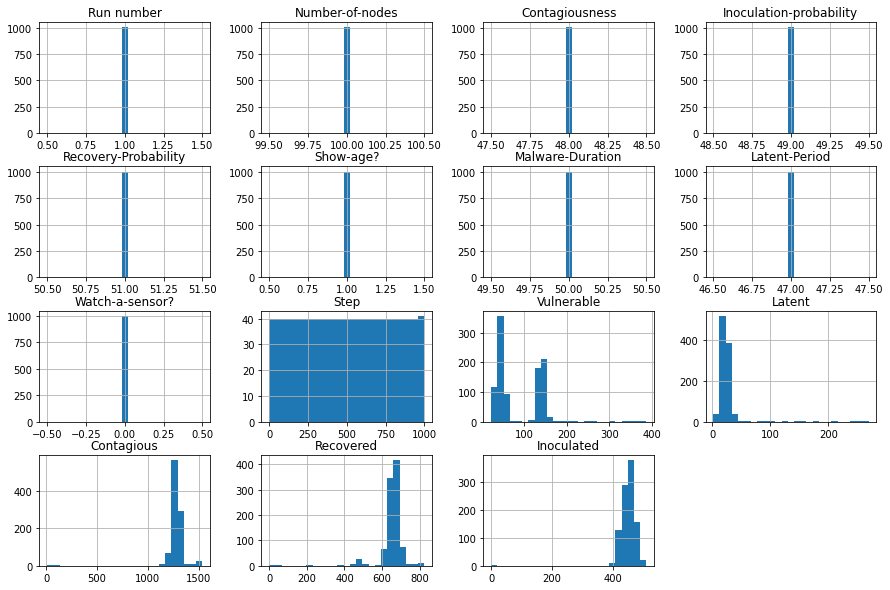

In [ ]:
df.hist(bins=25,figsize=(15,10))
# display histogram
plt.show()

In [ ]:
L = len(df)


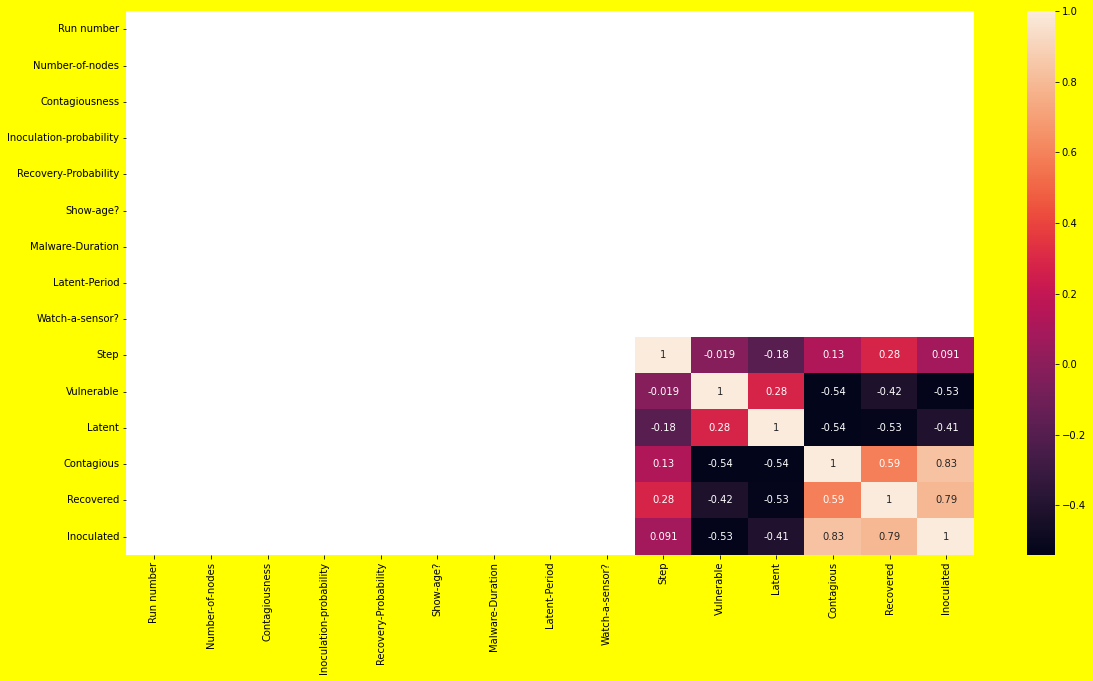

In [ ]:
# import seaborn
import seaborn as sb

# ploting heatmap
plt.figure(figsize=[19,10],facecolor='yellow')
sb.heatmap(df.corr(),annot=True)

*Put the Latent (Y) into an Array **bold text**

Vulnerable (10), Latent (11), Conatgious (12), Recovered (13) and Inoculated (14)

In [ ]:
print([df.iloc[:,11]])

[0        88
1       173
2       262
3       347
4       360
       ... 
996      51
997      48
998     145
999      41
1000    136
Name: Vulnerable, Length: 1001, dtype: int64]


In [ ]:
Y = np.array([df.iloc[:,11]])

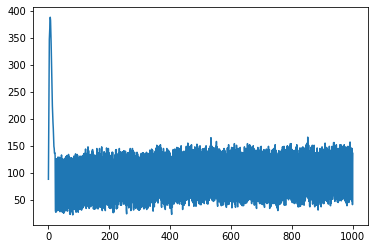

In [ ]:
plt.plot(Y[0,:])
plt.show(block=False)


In [ ]:
X1 = np.array([df.iloc[:,12]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

**The train:test ratio is started with 80:20 first. The other train/test scenarios are used in the Performace Evaluation of the paper. **

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

The Vanila Model is built and the activation function is tanh for the first time. Others activation is relu. optimizer (adam (1st)). Accuracy is used first. Other metrics such as MSE, RMSE and MAPE.

Arguments of model.fit; validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#model.fit(X_train,Y_train,epochs=50,verbose= 2)
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
18/18 - 3s - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0071 - 3s/epoch - 148ms/step
Epoch 2/20
18/18 - 0s - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0238 - val_accuracy: 0.0071 - 65ms/epoch - 4ms/step
Epoch 3/20
18/18 - 0s - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0237 - val_accuracy: 0.0071 - 77ms/epoch - 4ms/step
Epoch 4/20
18/18 - 0s - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0236 - val_accuracy: 0.0071 - 67ms/epoch - 4ms/step
Epoch 5/20
18/18 - 0s - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0235 - val_accuracy: 0.0071 - 72ms/epoch - 4ms/step
Epoch 6/20
18/18 - 0s - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0071 - 83ms/epoch - 5ms/step
Epoch 7/20
18/18 - 0s - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0232 - val_accuracy: 0.0071 - 87ms/epoch - 5ms/step
Epoch 8/20
18/18 - 0s - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0230 - val_accuracy: 0.0071 - 95ms/epoch - 5

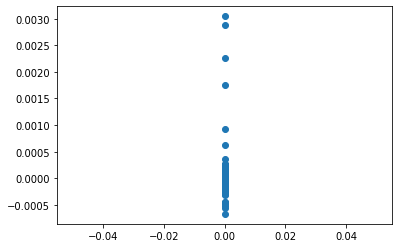

<Figure size 432x288 with 0 Axes>

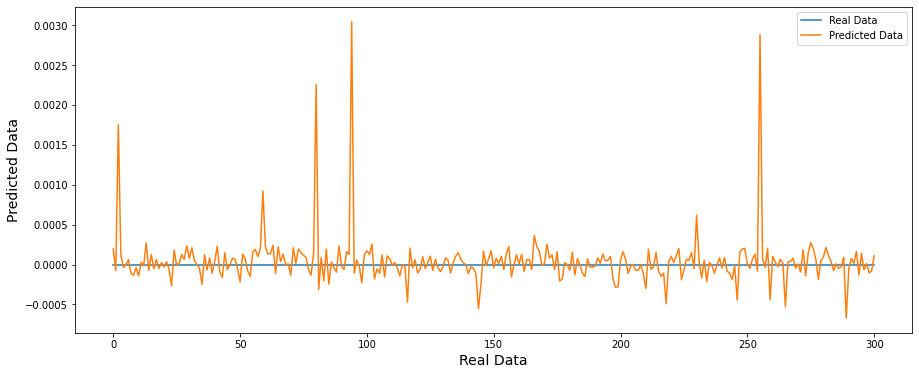

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


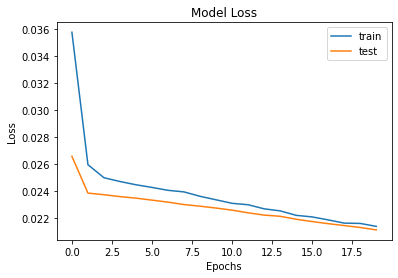

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show()

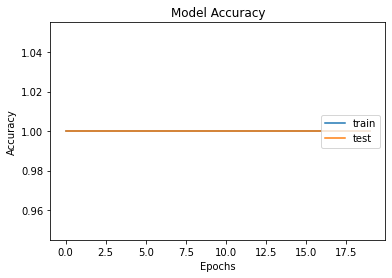

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 3), recurrent_activation='hard_sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#model.fit(X_train,Y_train,epochs=20,verbose= 2)
history = model.fit(X_train, Y_train, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/200


ValueError: ignored

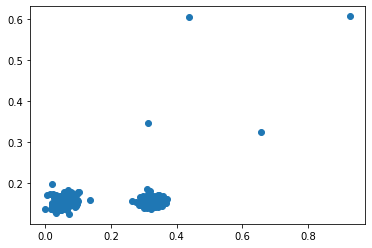

<Figure size 432x288 with 0 Axes>

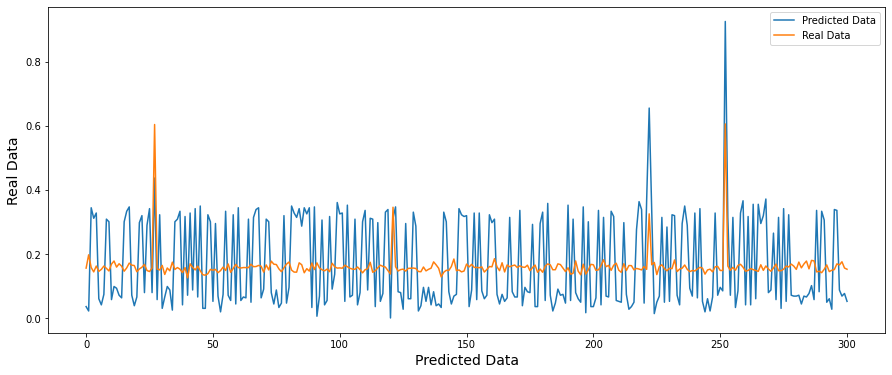

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Predicted Data',fontsize=14)
plt.ylabel('Real Data',fontsize=14)
plt.legend(["Predicted Data","Real Data"])
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='tanh', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#model.fit(X_train,Y_train,epochs=50,verbose= 2)
history = model.fit(X_train, Y_train, epochs=200, verbose=2)

predict =model.predict(X_test)

Epoch 1/200
22/22 - 2s - loss: 0.0318 - accuracy: 0.0000e+00 - 2s/epoch - 100ms/step
Epoch 2/200
22/22 - 0s - loss: 0.0252 - accuracy: 0.0000e+00 - 134ms/epoch - 6ms/step
Epoch 3/200
22/22 - 0s - loss: 0.0240 - accuracy: 0.0000e+00 - 130ms/epoch - 6ms/step
Epoch 4/200
22/22 - 0s - loss: 0.0232 - accuracy: 0.0000e+00 - 144ms/epoch - 7ms/step
Epoch 5/200
22/22 - 0s - loss: 0.0223 - accuracy: 0.0000e+00 - 141ms/epoch - 6ms/step
Epoch 6/200
22/22 - 0s - loss: 0.0216 - accuracy: 0.0000e+00 - 176ms/epoch - 8ms/step
Epoch 7/200
22/22 - 0s - loss: 0.0211 - accuracy: 0.0000e+00 - 171ms/epoch - 8ms/step
Epoch 8/200
22/22 - 0s - loss: 0.0205 - accuracy: 0.0000e+00 - 173ms/epoch - 8ms/step
Epoch 9/200
22/22 - 0s - loss: 0.0201 - accuracy: 0.0000e+00 - 146ms/epoch - 7ms/step
Epoch 10/200
22/22 - 0s - loss: 0.0199 - accuracy: 0.0000e+00 - 161ms/epoch - 7ms/step
Epoch 11/200
22/22 - 0s - loss: 0.0197 - accuracy: 0.0000e+00 - 138ms/epoch - 6ms/step
Epoch 12/200
22/22 - 0s - loss: 0.0195 - accuracy: 0.

**To Check the Impact of using 4 INputs (V, C, R and I) as Input, while L remains Output**

In [ ]:
Y = np.array([df.iloc[:,11]])

X1 = np.array([df.iloc[:,10]])
X2 = np.array([df.iloc[:,12]])
X3 = np.array([df.iloc[:,13]])
X4 = np.array([df.iloc[:,14]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#model.fit(X_train,Y_train,epochs=20,verbose= 2)
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 4s - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 0.0000e+00 - 4s/epoch - 184ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0275 - accuracy: 0.0000e+00 - val_loss: 0.0206 - val_accuracy: 0.0000e+00 - 106ms/epoch - 5ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0268 - accuracy: 0.0000e+00 - val_loss: 0.0208 - val_accuracy: 0.0000e+00 - 105ms/epoch - 5ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0204 - val_accuracy: 0.0000e+00 - 100ms/epoch - 5ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0205 - val_accuracy: 0.0000e+00 - 108ms/epoch - 5ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0202 - val_accuracy: 0.0000e+00 - 107ms/epoch - 5ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0251 - accuracy: 0.0000e+00 - val_loss: 0.0201 - val_accuracy: 0.0000e+00 - 110ms/epoch - 5ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0201 - val

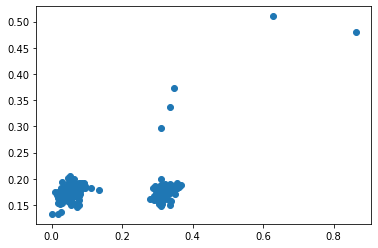

<Figure size 432x288 with 0 Axes>

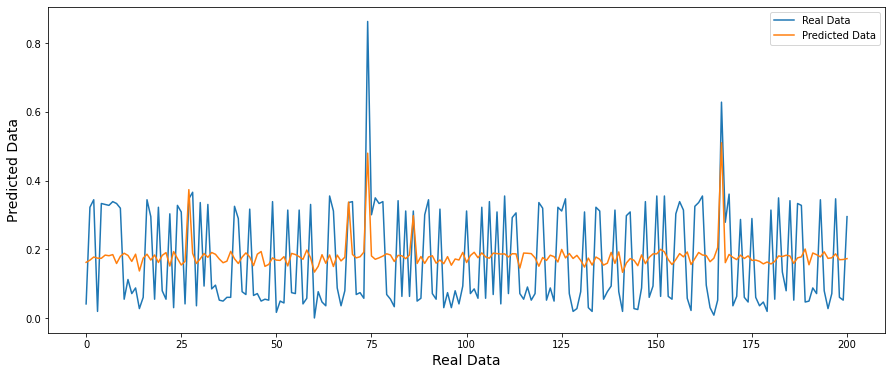

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


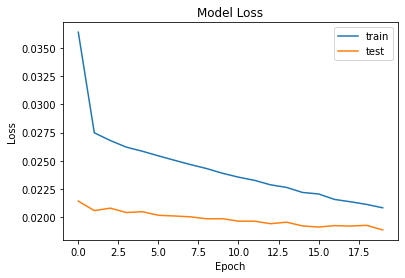

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show()

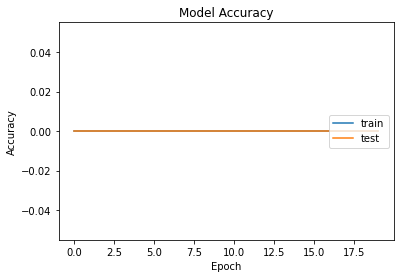

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
25/25 - 2s - loss: 0.0390 - accuracy: 0.0000e+00 - 2s/epoch - 63ms/step
Epoch 2/20
25/25 - 0s - loss: 0.0243 - accuracy: 0.0000e+00 - 44ms/epoch - 2ms/step
Epoch 3/20
25/25 - 0s - loss: 0.0237 - accuracy: 0.0000e+00 - 52ms/epoch - 2ms/step
Epoch 4/20
25/25 - 0s - loss: 0.0235 - accuracy: 0.0000e+00 - 58ms/epoch - 2ms/step
Epoch 5/20
25/25 - 0s - loss: 0.0232 - accuracy: 0.0000e+00 - 57ms/epoch - 2ms/step
Epoch 6/20
25/25 - 0s - loss: 0.0230 - accuracy: 0.0000e+00 - 62ms/epoch - 2ms/step
Epoch 7/20
25/25 - 0s - loss: 0.0228 - accuracy: 0.0000e+00 - 57ms/epoch - 2ms/step
Epoch 8/20
25/25 - 0s - loss: 0.0226 - accuracy: 0.0000e+00 - 54ms/epoch - 2ms/step
Epoch 9/20
25/25 - 0s - loss: 0.0224 - accuracy: 0.0000e+00 - 57ms/epoch - 2ms/step
Epoch 10/20
25/25 - 0s - loss: 0.0222 - accuracy: 0.0000e+00 - 58ms/epoch - 2ms/step
Epoch 11/20
25/25 - 0s - loss: 0.0220 - accuracy: 0.0000e+00 - 56ms/epoch - 2ms/step
Epoch 12/20
25/25 - 0s - loss: 0.0218 - accuracy: 0.0000e+00 - 61ms/epoch -

In [ ]:
model = Sequential()
model.add(LSTM(500, activation='tanh', input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=1000, verbose=2)

predict =model.predict(X_test)

Epoch 1/1000
20/20 - 4s - loss: 0.0314 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 4s/epoch - 181ms/step
Epoch 2/1000
20/20 - 0s - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0200 - val_accuracy: 0.0000e+00 - 328ms/epoch - 16ms/step
Epoch 3/1000
20/20 - 0s - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 339ms/epoch - 17ms/step
Epoch 4/1000
20/20 - 0s - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 331ms/epoch - 17ms/step
Epoch 5/1000
20/20 - 0s - loss: 0.0226 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00 - 344ms/epoch - 17ms/step
Epoch 6/1000
20/20 - 0s - loss: 0.0217 - accuracy: 0.0000e+00 - val_loss: 0.0200 - val_accuracy: 0.0000e+00 - 331ms/epoch - 17ms/step
Epoch 7/1000
20/20 - 0s - loss: 0.0212 - accuracy: 0.0000e+00 - val_loss: 0.0198 - val_accuracy: 0.0000e+00 - 313ms/epoch - 16ms/step
Epoch 8/1000
20/20 - 0s - loss: 0.0206 - accuracy: 0.0000e+00 - 

**At Vanilla LSTM Layer of 300 and 500 epochs, it started to give a better output**

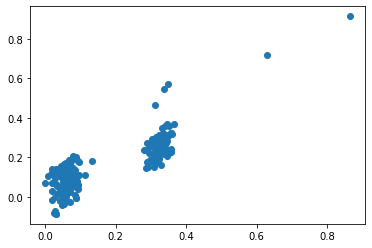

<Figure size 432x288 with 0 Axes>

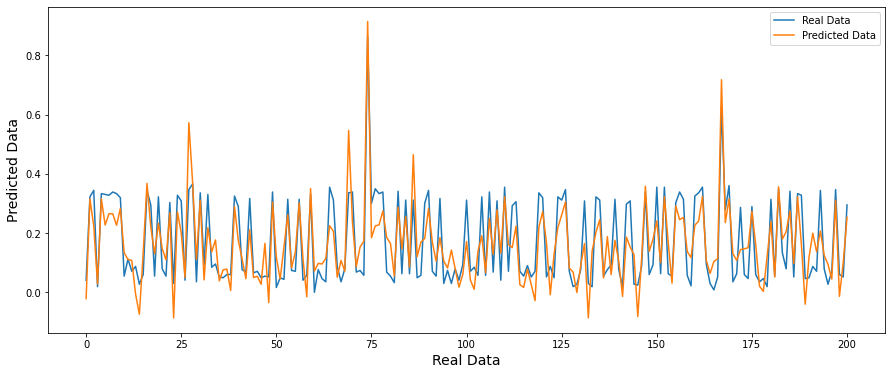

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


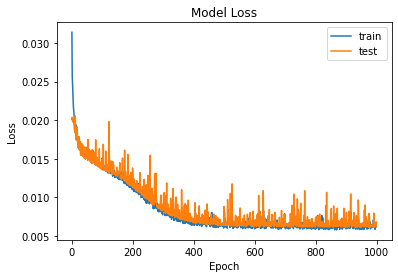

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='centre right')
plt.show()

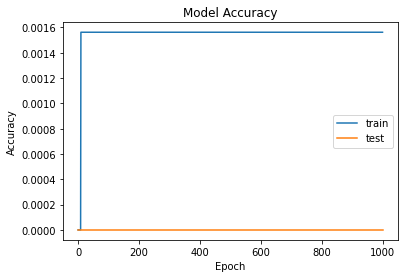

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**Analyses for 1050 Nodes **

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 1050 Nodes.csv to MSS Experiment with 1050 Nodes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 1050 Nodes.csv']))

In [ ]:
df.head()

,Run number,Number-of-nodes,Contagiousness,Inoculation-Probability,Recovery-Probability,Show-age?,Malware-duration,Turtle-shape,Latent-Period,Watch-a-sensor?,Step,Vulnerable,Latent,Contagious,Recovered,Inoculated
0,1,1050,48,49,51,True,50,"""person""",47,False,0,925,21,104,0,0
1,1,1050,48,49,51,True,50,"""person""",47,False,1,1505,236,241,118,118
2,1,1050,48,49,51,True,50,"""person""",47,False,2,350,687,575,482,482
3,1,1050,48,49,51,True,50,"""person""",47,False,3,297,641,641,500,500
4,1,1050,48,49,51,True,50,"""person""",47,False,4,276,632,654,502,502


Vulnerable (11), Latent (12), Contagious (13), Recovered (14), Inoculated (15)

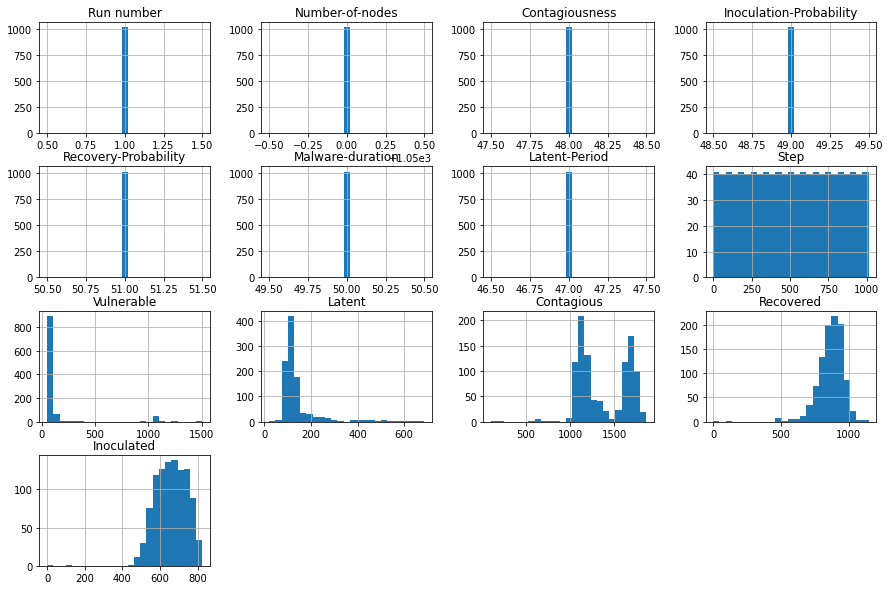

In [ ]:
df.hist(bins=25,figsize=(15,10))
# display histogram
plt.show()

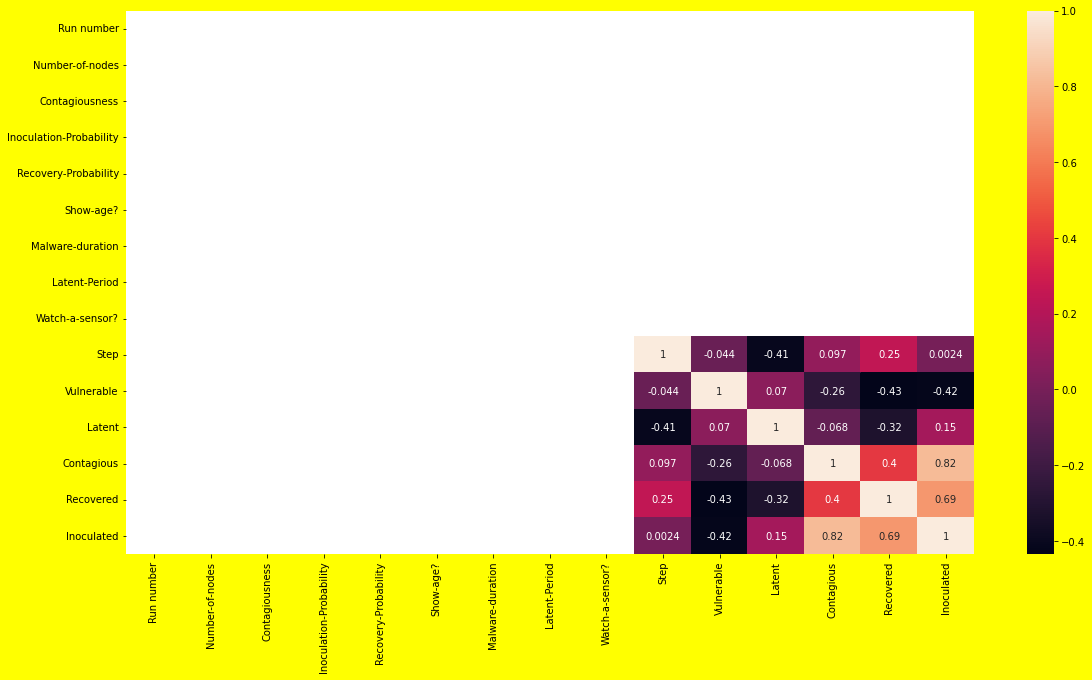

In [ ]:
# import seaborn
import seaborn as sb

# ploting heatmap
plt.figure(figsize=[19,10],facecolor='yellow')
sb.heatmap(df.corr(),annot=True)

Vulnerable (11), Latent (12), Contagious (13), Recovered (14), Inoculated (15)

Y is the output and it is the Latent class

In [ ]:
Y = np.array([df.iloc[:,12]])

Print the values of the Latent class

In [ ]:
print(Y)

[[ 21 236 687 ... 123 121 118]]


The Inputs are contagious (13), recovered(14) and Innoculated (15)

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 3s - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0152 - val_accuracy: 0.0000e+00 - 3s/epoch - 140ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00 - 76ms/epoch - 4ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00 - 75ms/epoch - 4ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0172 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00 - 91ms/epoch - 4ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0171 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00 - 92ms/epoch - 4ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0170 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00 - 98ms/epoch - 5ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00 - 89ms/epoch - 4ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0168 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accur

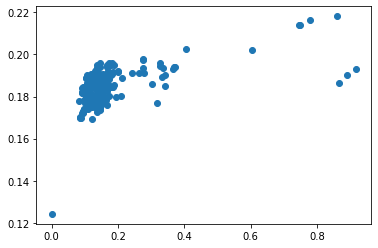

<Figure size 432x288 with 0 Axes>

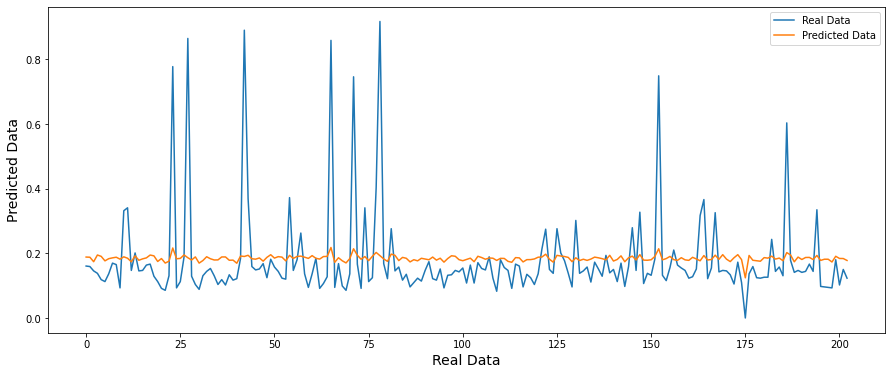

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


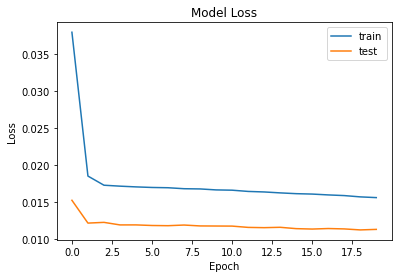

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='centre right')
plt.show()

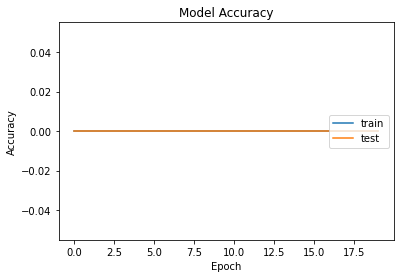

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

Vulnerable (11), Latent (12), Contagious (13), Recovered (14), Inoculated (15)

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 3s - loss: 0.0243 - accuracy: 0.0015 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - 3s/epoch - 121ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0165 - accuracy: 0.0015 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - 81ms/epoch - 4ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0164 - accuracy: 0.0015 - val_loss: 0.0149 - val_accuracy: 0.0000e+00 - 77ms/epoch - 4ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0161 - accuracy: 0.0015 - val_loss: 0.0147 - val_accuracy: 0.0000e+00 - 80ms/epoch - 4ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0159 - accuracy: 0.0015 - val_loss: 0.0145 - val_accuracy: 0.0000e+00 - 93ms/epoch - 4ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0158 - accuracy: 0.0015 - val_loss: 0.0143 - val_accuracy: 0.0000e+00 - 73ms/epoch - 3ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0157 - accuracy: 0.0015 - val_loss: 0.0141 - val_accuracy: 0.0000e+00 - 73ms/epoch - 3ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0156 - accuracy: 0.0015 - val_loss: 0.0140 - val_accuracy: 0.0000e+00 - 86ms/epoch - 4

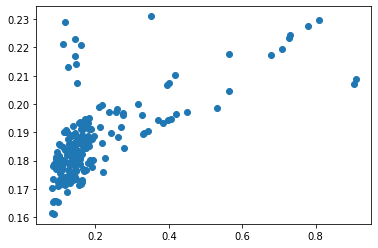

<Figure size 432x288 with 0 Axes>

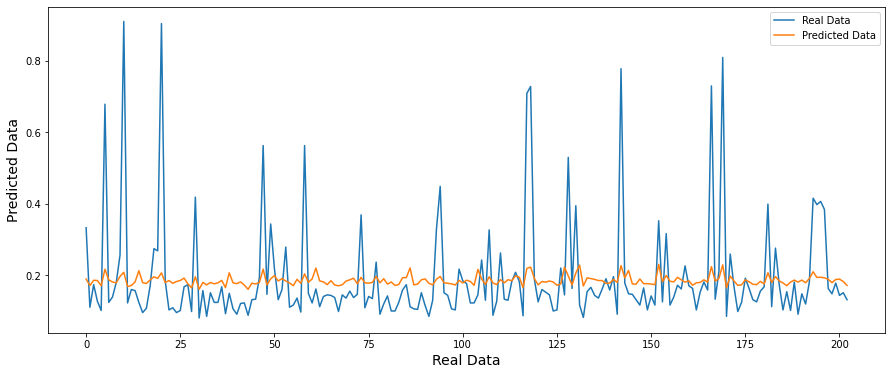

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


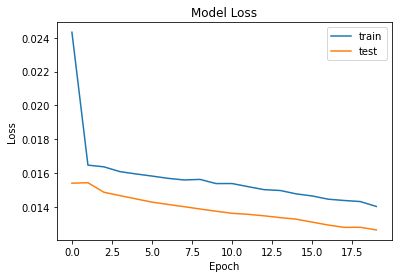

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='centre right')
plt.show()

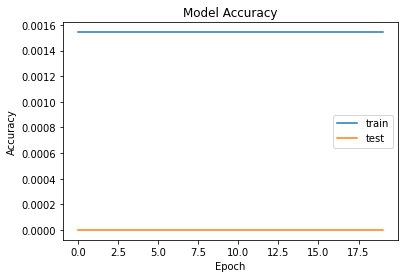

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**VANILLA LSTM, 100 NODES, 3 INPUTS**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 100 Nodes.csv to MSS Experiment with 100 Nodes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 3s - loss: 0.0101 - accuracy: 0.0016 - val_loss: 0.0075 - val_accuracy: 0.0000e+00 - 3s/epoch - 137ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0070 - accuracy: 0.0016 - val_loss: 0.0075 - val_accuracy: 0.0000e+00 - 62ms/epoch - 3ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0068 - accuracy: 0.0016 - val_loss: 0.0074 - val_accuracy: 0.0000e+00 - 60ms/epoch - 3ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0068 - accuracy: 0.0016 - val_loss: 0.0074 - val_accuracy: 0.0000e+00 - 59ms/epoch - 3ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0067 - accuracy: 0.0016 - val_loss: 0.0073 - val_accuracy: 0.0000e+00 - 70ms/epoch - 3ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0067 - accuracy: 0.0016 - val_loss: 0.0073 - val_accuracy: 0.0000e+00 - 62ms/epoch - 3ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0066 - accuracy: 0.0016 - val_loss: 0.0072 - val_accuracy: 0.0000e+00 - 66ms/epoch - 3ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0066 - accuracy: 0.0016 - val_loss: 0.0072 - val_accuracy: 0.0000e+00 - 71ms/epoch - 4

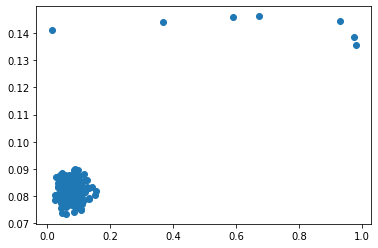

<Figure size 432x288 with 0 Axes>

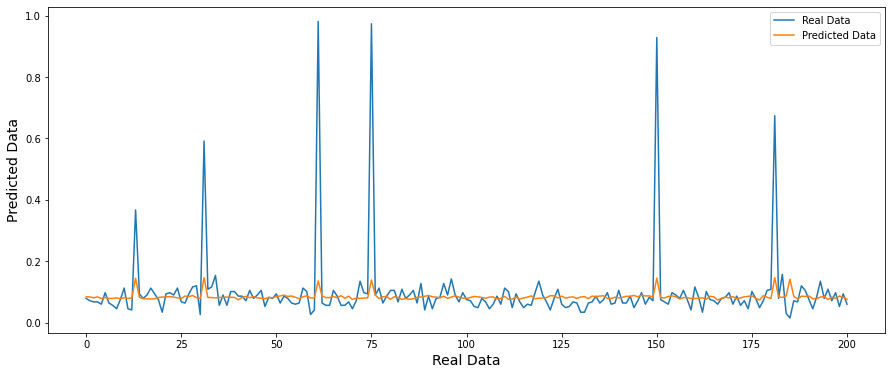

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


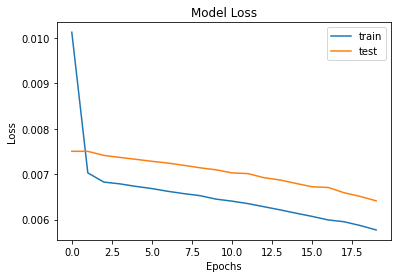

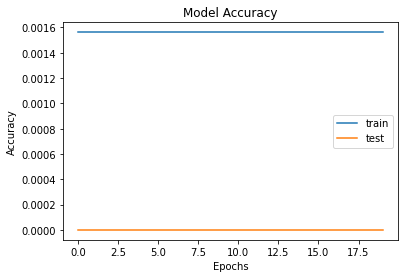

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**VANILLA LSTM, 100 NODES AND 4 INPUTS**

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 3s - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - 3s/epoch - 144ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - 72ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0106 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - 80ms/epoch - 4ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0103 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - 82ms/epoch - 4ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00 - 78ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0096 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00 - 78ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00 - 67ms/epoch - 3ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accur

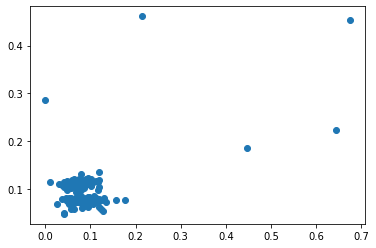

<Figure size 432x288 with 0 Axes>

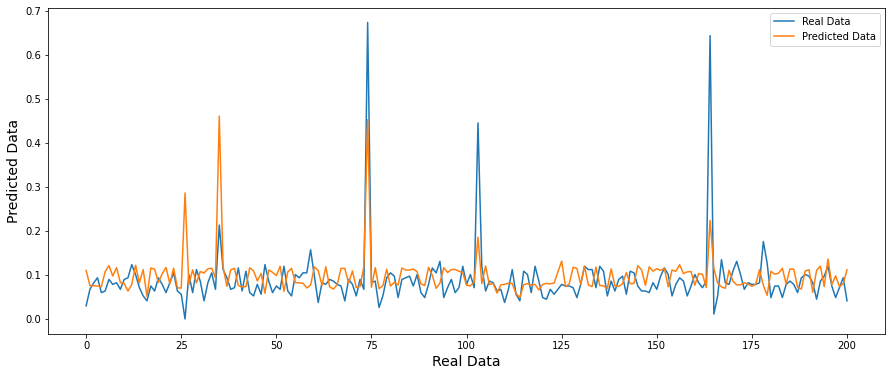

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


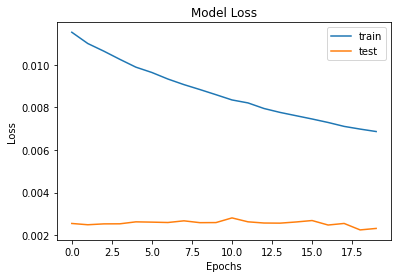

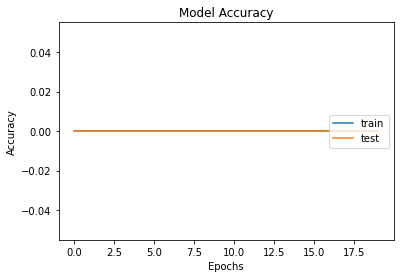

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED/MULTIPLE LSTM**

Stacked LSTMs for 100 Nodes and 3 Inputs

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

STacks of 10 Layers, with 3 Inouts at 100 Nodes

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='tanh', return_sequences=True,input_shape=(1, 3)))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 5s - loss: 0.0148 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0063 - 5s/epoch - 234ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0063 - 71ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0063 - 92ms/epoch - 5ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0063 - 78ms/epoch - 4ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0063 - 79ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0063 - 92ms/epoch - 5ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0063 - 84ms/epoch - 4ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0063 - 84ms/epoch - 4

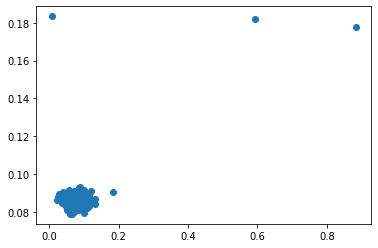

<Figure size 432x288 with 0 Axes>

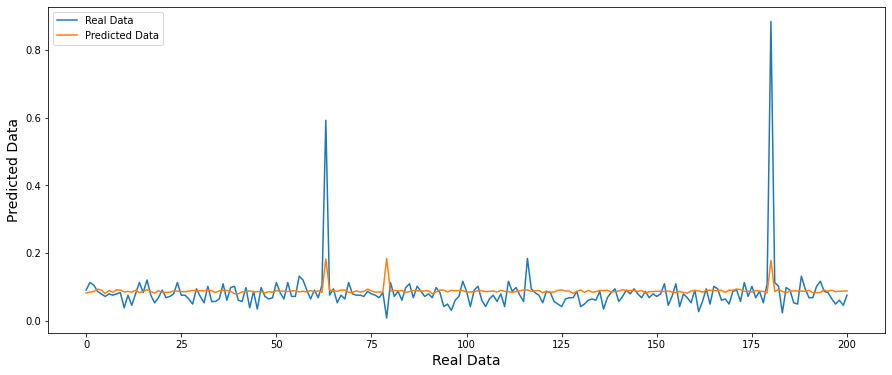

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


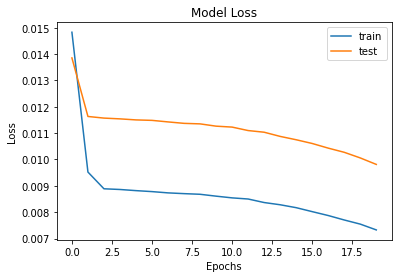

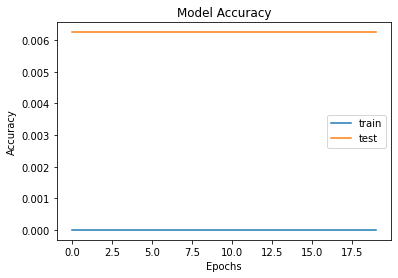

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

STACKED LSTMs, with 3 Inputs and 100 Nodes

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True,input_shape=(1, 3)))
model.add(LSTM(20, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 4s - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0063 - 4s/epoch - 196ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0063 - 85ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0063 - 95ms/epoch - 5ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0063 - 78ms/epoch - 4ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0063 - 81ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0063 - 77ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0063 - 80ms/epoch - 4ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0063 - 93ms/epoch - 5

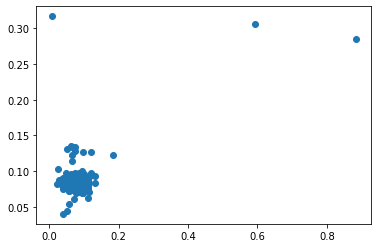

<Figure size 432x288 with 0 Axes>

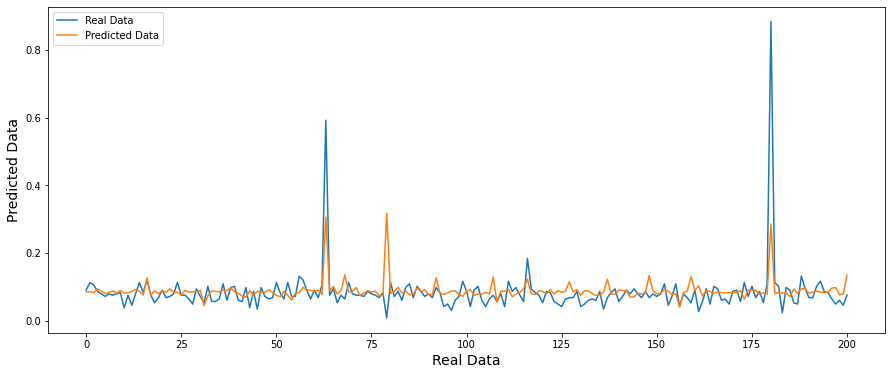

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


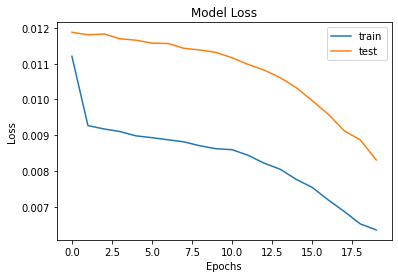

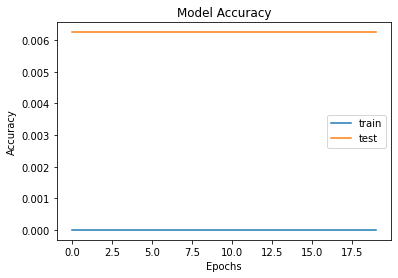

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

Stacked LSTMs for 100 Nodes and 4 Inputs



Start with the arrays since the dataset is already imported in Colab

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True,input_shape=(1, 4)))
model.add(LSTM(20, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 5s - loss: 0.0093 - accuracy: 0.0016 - val_loss: 0.0204 - val_accuracy: 0.0000e+00 - 5s/epoch - 235ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0074 - accuracy: 0.0016 - val_loss: 0.0201 - val_accuracy: 0.0000e+00 - 89ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0200 - val_accuracy: 0.0000e+00 - 81ms/epoch - 4ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0198 - val_accuracy: 0.0000e+00 - 90ms/epoch - 5ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0072 - accuracy: 0.0016 - val_loss: 0.0195 - val_accuracy: 0.0000e+00 - 89ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0072 - accuracy: 0.0016 - val_loss: 0.0194 - val_accuracy: 0.0000e+00 - 90ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0071 - accuracy: 0.0016 - val_loss: 0.0190 - val_accuracy: 0.0000e+00 - 84ms/epoch - 4ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0070 - accuracy: 0.0016 - val_loss: 0.0186 - val_accuracy: 0.0000e+00 - 94ms/epoch - 5

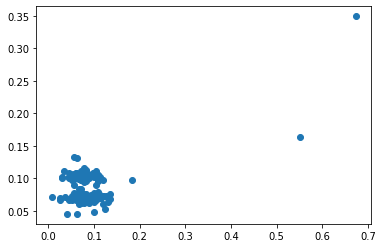

<Figure size 432x288 with 0 Axes>

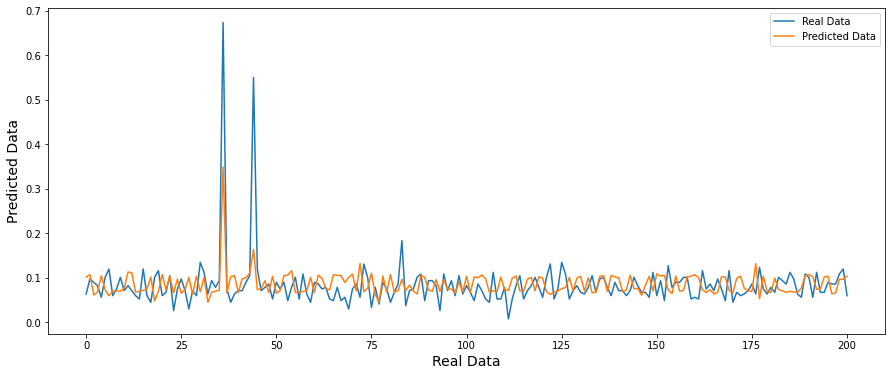

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


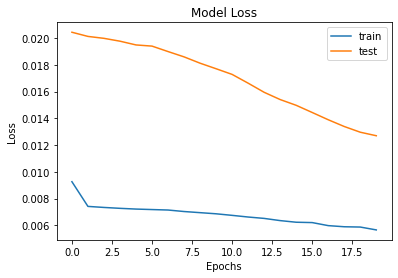

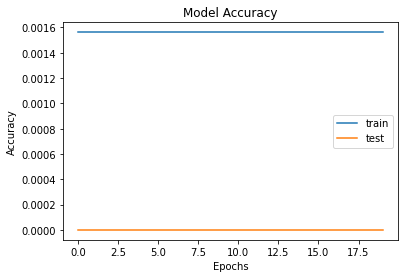

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED LSTMS 100 NODES, 4 INPUTS, 2 STACKS OF 10 LAYERS**

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='tanh', return_sequences=True,input_shape=(1, 4)))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 5s - loss: 0.0091 - accuracy: 0.0016 - val_loss: 0.0209 - val_accuracy: 0.0000e+00 - 5s/epoch - 237ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0076 - accuracy: 0.0016 - val_loss: 0.0205 - val_accuracy: 0.0000e+00 - 73ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0074 - accuracy: 0.0016 - val_loss: 0.0207 - val_accuracy: 0.0000e+00 - 70ms/epoch - 4ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0074 - accuracy: 0.0016 - val_loss: 0.0204 - val_accuracy: 0.0000e+00 - 90ms/epoch - 4ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 95ms/epoch - 5ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0202 - val_accuracy: 0.0000e+00 - 86ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0200 - val_accuracy: 0.0000e+00 - 95ms/epoch - 5ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0072 - accuracy: 0.0016 - val_loss: 0.0199 - val_accuracy: 0.0000e+00 - 96ms/epoch - 5

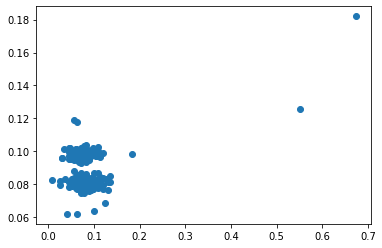

<Figure size 432x288 with 0 Axes>

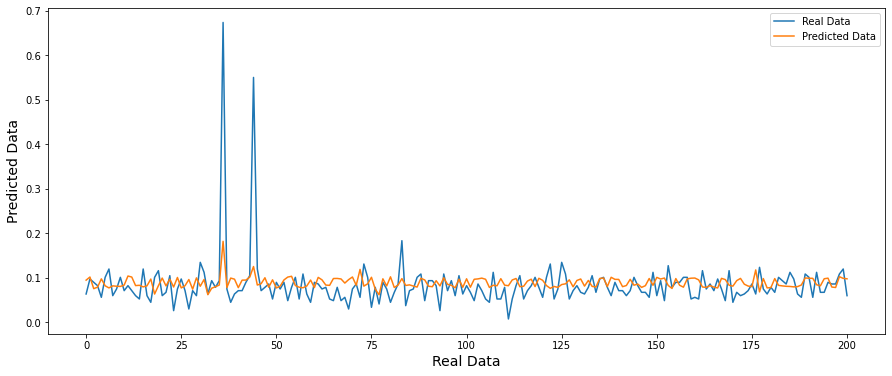

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


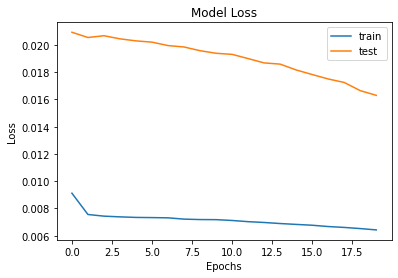

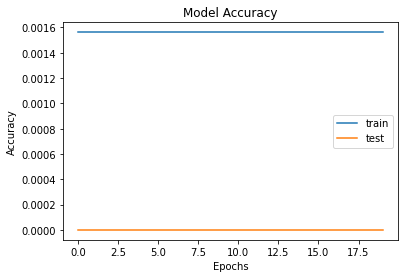

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED LSTM, 1050 NODES, 3 INPUTS, STACKS OF 10 LAYERS**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 1050 Nodes.csv to MSS Experiment with 1050 Nodes (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 1050 Nodes.csv']))

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='tanh', return_sequences=True,input_shape=(1, 3)))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 5s - loss: 0.0356 - accuracy: 0.0015 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - 5s/epoch - 256ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0217 - accuracy: 0.0015 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - 105ms/epoch - 5ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0183 - accuracy: 0.0015 - val_loss: 0.0095 - val_accuracy: 0.0000e+00 - 115ms/epoch - 5ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0182 - accuracy: 0.0015 - val_loss: 0.0093 - val_accuracy: 0.0000e+00 - 118ms/epoch - 6ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0181 - accuracy: 0.0015 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - 101ms/epoch - 5ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0181 - accuracy: 0.0015 - val_loss: 0.0093 - val_accuracy: 0.0000e+00 - 110ms/epoch - 5ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0181 - accuracy: 0.0015 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - 117ms/epoch - 6ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0180 - accuracy: 0.0015 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - 123ms/ep

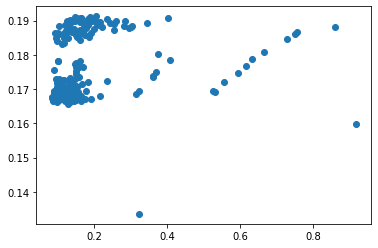

<Figure size 432x288 with 0 Axes>

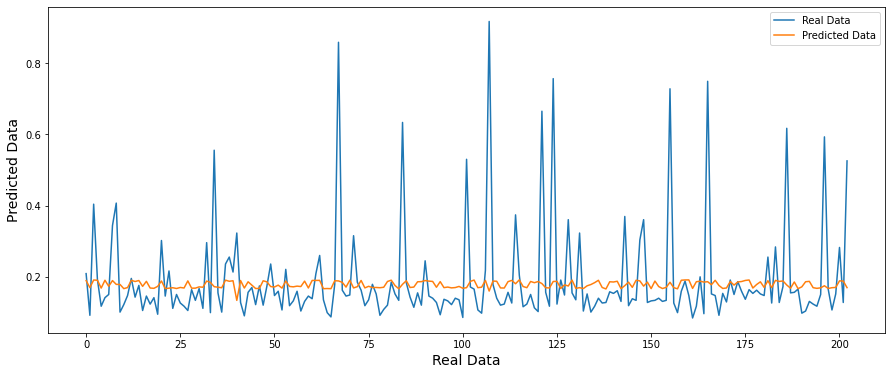

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


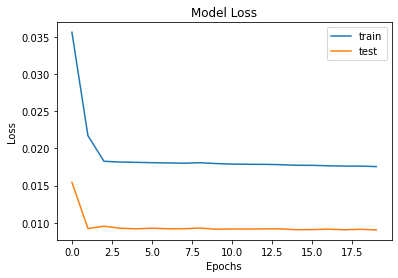

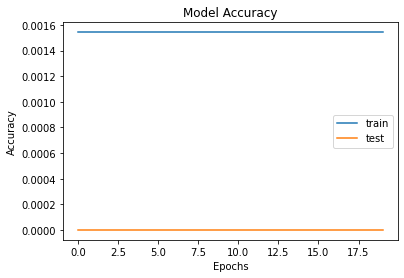

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED LSTMS, 1050 NODES, 3 INPUTS, 2 STACKS OF 10 LAYERS**

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True,input_shape=(1, 3)))
model.add(LSTM(20, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 5s - loss: 0.0381 - accuracy: 0.0015 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - 5s/epoch - 238ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0209 - accuracy: 0.0015 - val_loss: 0.0090 - val_accuracy: 0.0000e+00 - 112ms/epoch - 5ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0180 - accuracy: 0.0015 - val_loss: 0.0094 - val_accuracy: 0.0000e+00 - 121ms/epoch - 6ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0179 - accuracy: 0.0015 - val_loss: 0.0090 - val_accuracy: 0.0000e+00 - 132ms/epoch - 6ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0179 - accuracy: 0.0015 - val_loss: 0.0091 - val_accuracy: 0.0000e+00 - 127ms/epoch - 6ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0179 - accuracy: 0.0015 - val_loss: 0.0091 - val_accuracy: 0.0000e+00 - 122ms/epoch - 6ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0178 - accuracy: 0.0015 - val_loss: 0.0091 - val_accuracy: 0.0000e+00 - 125ms/epoch - 6ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0178 - accuracy: 0.0015 - val_loss: 0.0091 - val_accuracy: 0.0000e+00 - 134ms/ep

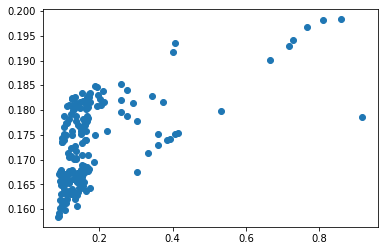

<Figure size 432x288 with 0 Axes>

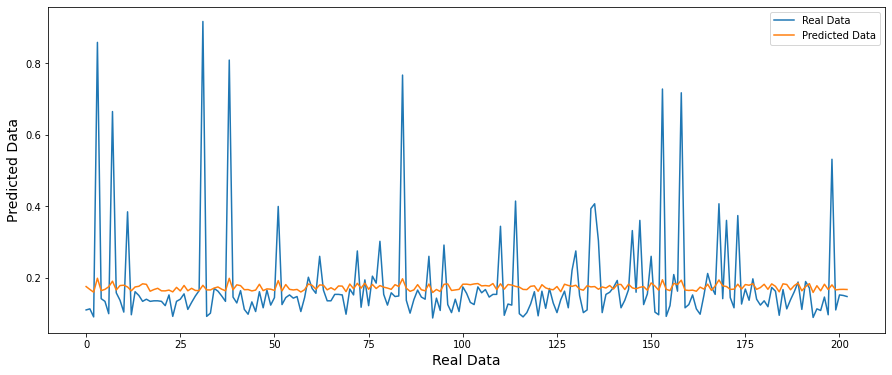

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


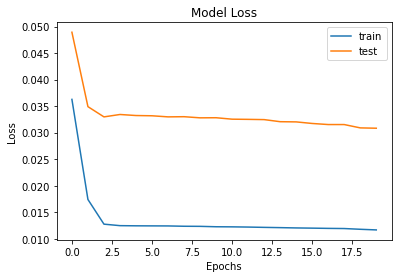

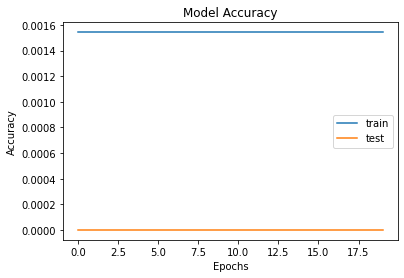

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED LSTMS, 1050 NODES, 4 INPUTS, 2 STACKS OF 10 LAYERS**

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='tanh', return_sequences=True,input_shape=(1, 4)))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 9s - loss: 0.0273 - accuracy: 0.0015 - val_loss: 0.0443 - val_accuracy: 0.0000e+00 - 9s/epoch - 445ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0159 - accuracy: 0.0015 - val_loss: 0.0350 - val_accuracy: 0.0000e+00 - 103ms/epoch - 5ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0126 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 133ms/epoch - 6ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0126 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 108ms/epoch - 5ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0126 - accuracy: 0.0015 - val_loss: 0.0336 - val_accuracy: 0.0000e+00 - 108ms/epoch - 5ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0125 - accuracy: 0.0015 - val_loss: 0.0331 - val_accuracy: 0.0000e+00 - 112ms/epoch - 5ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0125 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 105ms/epoch - 5ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0125 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 111ms/ep

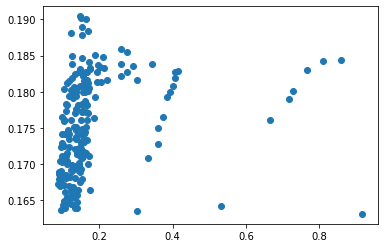

<Figure size 432x288 with 0 Axes>

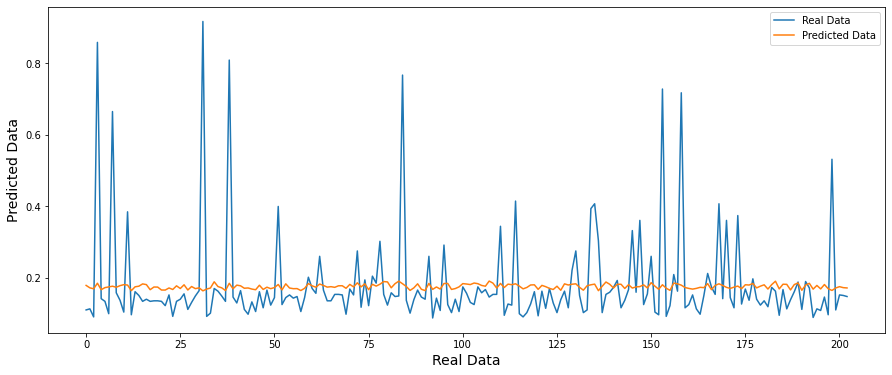

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


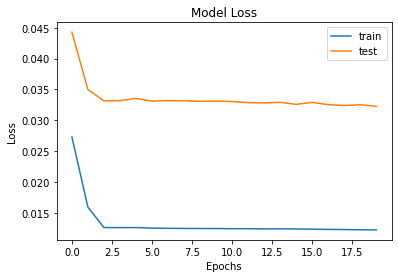

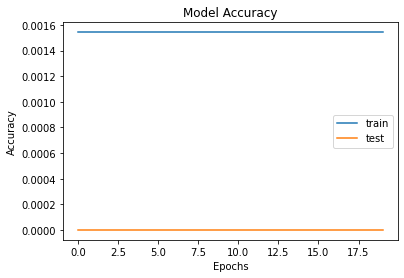

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**STACKED LSTMS, 1050 NODES, 4 INPUTS, 2 STACKS OF 20 LAYERS**

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True,input_shape=(1, 4)))
model.add(LSTM(20, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
21/21 - 7s - loss: 0.0363 - accuracy: 0.0015 - val_loss: 0.0489 - val_accuracy: 0.0000e+00 - 7s/epoch - 340ms/step
Epoch 2/20
21/21 - 0s - loss: 0.0174 - accuracy: 0.0015 - val_loss: 0.0349 - val_accuracy: 0.0000e+00 - 110ms/epoch - 5ms/step
Epoch 3/20
21/21 - 0s - loss: 0.0128 - accuracy: 0.0015 - val_loss: 0.0330 - val_accuracy: 0.0000e+00 - 117ms/epoch - 6ms/step
Epoch 4/20
21/21 - 0s - loss: 0.0125 - accuracy: 0.0015 - val_loss: 0.0334 - val_accuracy: 0.0000e+00 - 99ms/epoch - 5ms/step
Epoch 5/20
21/21 - 0s - loss: 0.0124 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 113ms/epoch - 5ms/step
Epoch 6/20
21/21 - 0s - loss: 0.0124 - accuracy: 0.0015 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - 138ms/epoch - 7ms/step
Epoch 7/20
21/21 - 0s - loss: 0.0124 - accuracy: 0.0015 - val_loss: 0.0330 - val_accuracy: 0.0000e+00 - 126ms/epoch - 6ms/step
Epoch 8/20
21/21 - 0s - loss: 0.0124 - accuracy: 0.0015 - val_loss: 0.0330 - val_accuracy: 0.0000e+00 - 117ms/epo

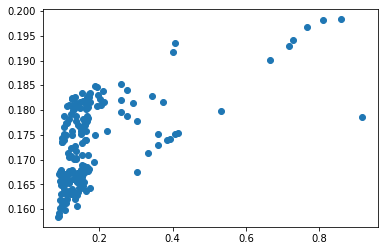

<Figure size 432x288 with 0 Axes>

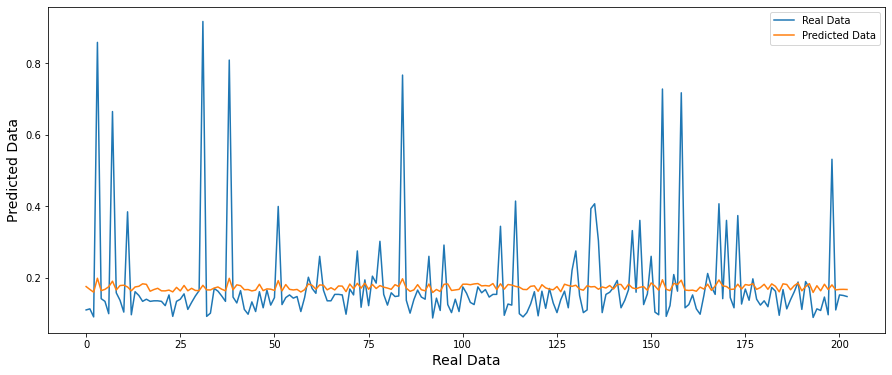

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


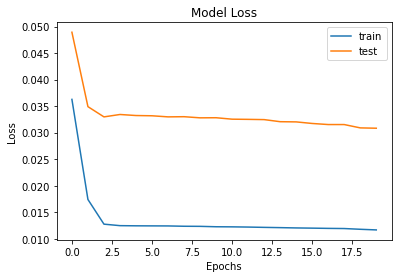

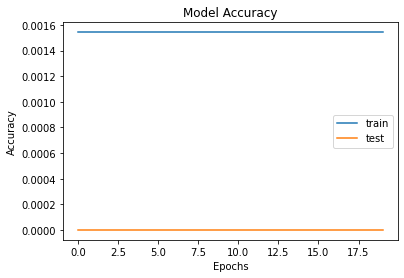

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

***BIDIRECTIONAL LSTMS ***

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics
from keras.layers import Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 100 Nodes.csv to MSS Experiment with 100 Nodes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

Vulnerable (11), Latent (12), Contagious (13), Recovered (14), Inoculated (15)

Y is the output and it is the Latent class

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 4s - loss: 0.0095 - accuracy: 0.0016 - val_loss: 0.0064 - val_accuracy: 0.0000e+00 - 4s/epoch - 204ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0092 - accuracy: 0.0016 - val_loss: 0.0062 - val_accuracy: 0.0000e+00 - 80ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0090 - accuracy: 0.0016 - val_loss: 0.0061 - val_accuracy: 0.0000e+00 - 62ms/epoch - 3ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0087 - accuracy: 0.0016 - val_loss: 0.0059 - val_accuracy: 0.0000e+00 - 99ms/epoch - 5ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0085 - accuracy: 0.0016 - val_loss: 0.0058 - val_accuracy: 0.0000e+00 - 67ms/epoch - 3ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0083 - accuracy: 0.0016 - val_loss: 0.0056 - val_accuracy: 0.0000e+00 - 70ms/epoch - 3ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0081 - accuracy: 0.0016 - val_loss: 0.0056 - val_accuracy: 0.0000e+00 - 67ms/epoch - 3ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0079 - accuracy: 0.0016 - val_loss: 0.0053 - val_accuracy: 0.0000e+00 - 69ms/epoch - 3

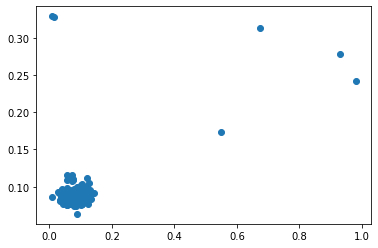

<Figure size 432x288 with 0 Axes>

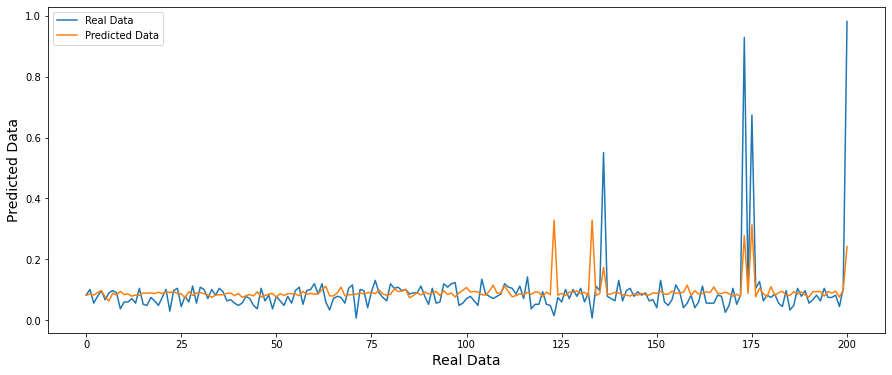

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


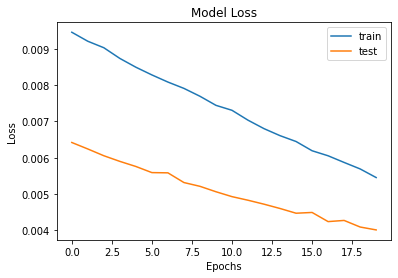

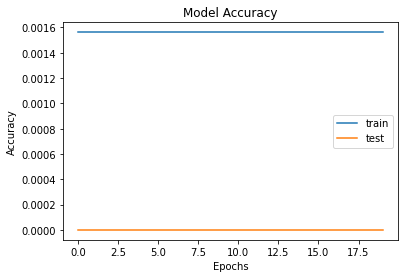

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

BI-DIRECTIONAL LSTM, 4 INPUTS, 20 LAYERS, 100 NODES

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 6s - loss: 0.0079 - accuracy: 0.0016 - val_loss: 0.0209 - val_accuracy: 0.0000e+00 - 6s/epoch - 316ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0055 - accuracy: 0.0016 - val_loss: 0.0210 - val_accuracy: 0.0000e+00 - 110ms/epoch - 6ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0052 - accuracy: 0.0016 - val_loss: 0.0204 - val_accuracy: 0.0000e+00 - 74ms/epoch - 4ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0051 - accuracy: 0.0016 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 78ms/epoch - 4ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0050 - accuracy: 0.0016 - val_loss: 0.0201 - val_accuracy: 0.0000e+00 - 75ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0049 - accuracy: 0.0016 - val_loss: 0.0198 - val_accuracy: 0.0000e+00 - 76ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0048 - accuracy: 0.0016 - val_loss: 0.0197 - val_accuracy: 0.0000e+00 - 73ms/epoch - 4ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0047 - accuracy: 0.0016 - val_loss: 0.0194 - val_accuracy: 0.0000e+00 - 64ms/epoch - 

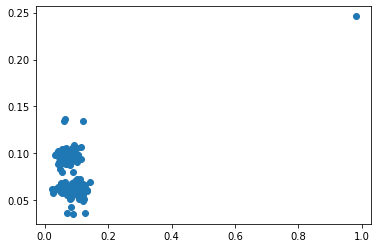

<Figure size 432x288 with 0 Axes>

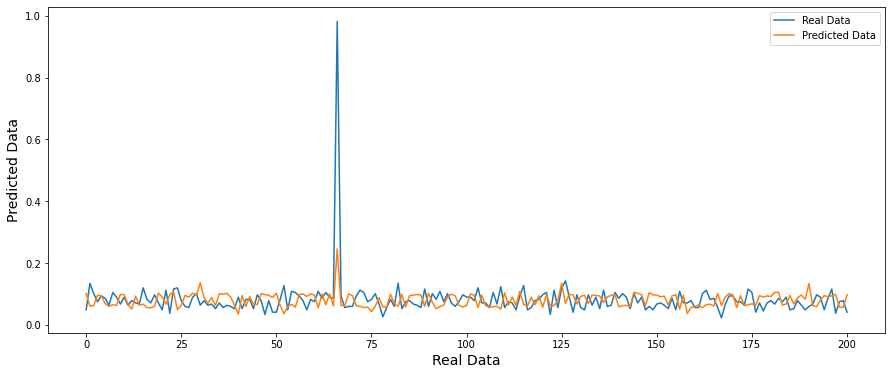

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


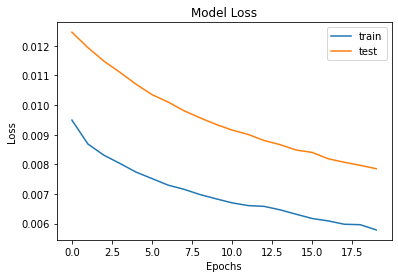

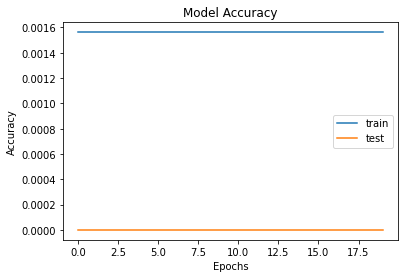

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

BIDIRECTIONAL LSTM, 1050 NODES, 3 INPUTS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 1050 Nodes.csv to MSS Experiment with 1050 Nodes.csv


In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 6s - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0063 - 6s/epoch - 292ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0063 - 90ms/epoch - 4ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0063 - 91ms/epoch - 5ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0063 - 99ms/epoch - 5ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0063 - 102ms/epoch - 5ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0063 - 136ms/epoch - 7ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0106 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0063 - 155ms/epoch - 8ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0104 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0063 - 120ms/epoch

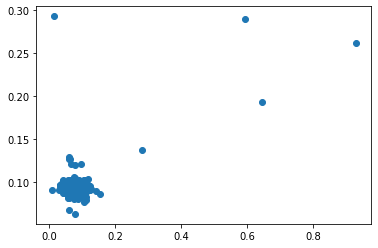

<Figure size 432x288 with 0 Axes>

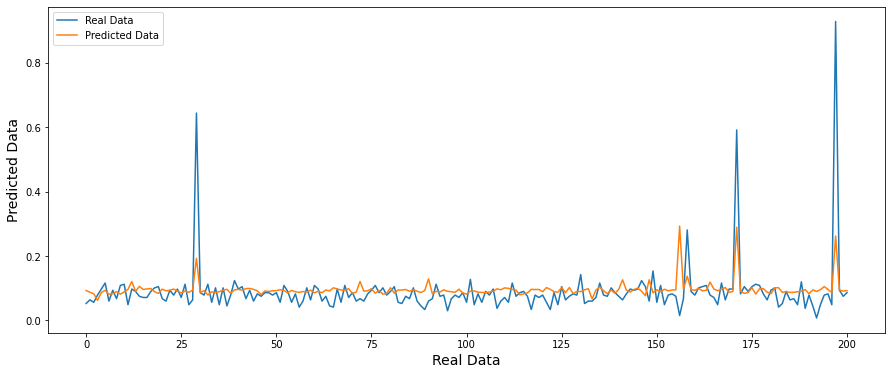

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


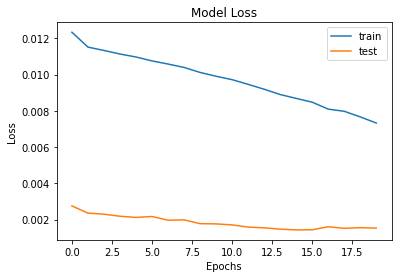

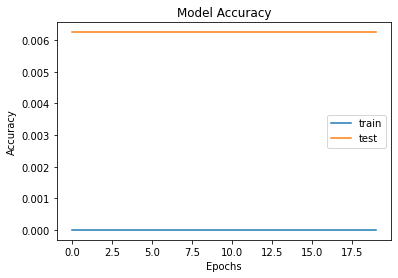

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

BIDIRECTIONAL LSTMS, 1050 NODES, 4 INPUTS, 20 LAYERS

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)

In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 9s - loss: 0.0095 - accuracy: 0.0016 - val_loss: 0.0125 - val_accuracy: 0.0000e+00 - 9s/epoch - 441ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0087 - accuracy: 0.0016 - val_loss: 0.0119 - val_accuracy: 0.0000e+00 - 172ms/epoch - 9ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0083 - accuracy: 0.0016 - val_loss: 0.0115 - val_accuracy: 0.0000e+00 - 123ms/epoch - 6ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0080 - accuracy: 0.0016 - val_loss: 0.0111 - val_accuracy: 0.0000e+00 - 218ms/epoch - 11ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0077 - accuracy: 0.0016 - val_loss: 0.0107 - val_accuracy: 0.0000e+00 - 148ms/epoch - 7ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0075 - accuracy: 0.0016 - val_loss: 0.0104 - val_accuracy: 0.0000e+00 - 150ms/epoch - 8ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0016 - val_loss: 0.0101 - val_accuracy: 0.0000e+00 - 177ms/epoch - 9ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0072 - accuracy: 0.0016 - val_loss: 0.0098 - val_accuracy: 0.0000e+00 - 222ms/e

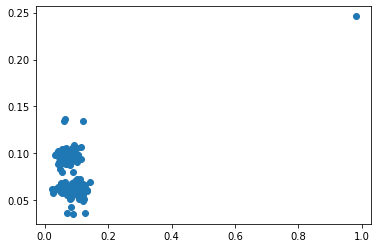

<Figure size 432x288 with 0 Axes>

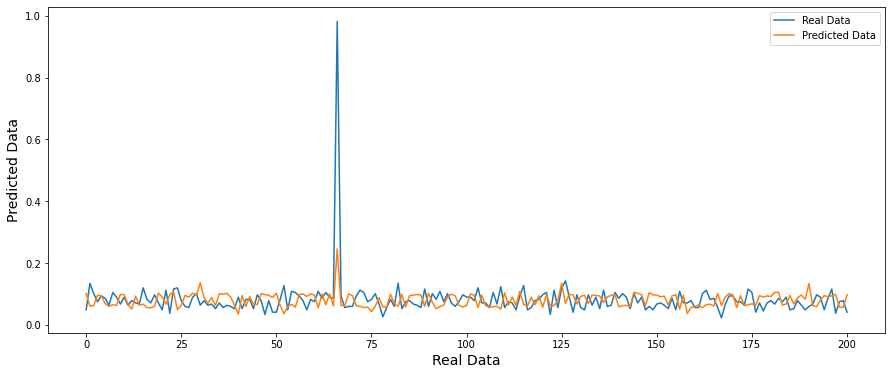

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


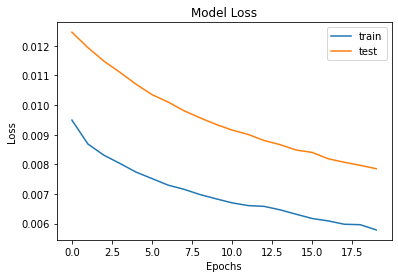

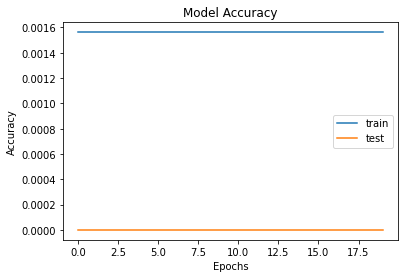

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**REDOING BLSTM COS I AM CONFUSED **

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 100 Nodes.csv to MSS Experiment with 100 Nodes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

Vulnerable (11), Latent (12), Contagious (13), Recovered (14), Inoculated (15)

Y is the output and it is the Latent class

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,13]])
X2 = np.array([df.iloc[:,14]])
X3 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 10s - loss: 0.0086 - accuracy: 0.0016 - val_loss: 0.0125 - val_accuracy: 0.0000e+00 - 10s/epoch - 479ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0082 - accuracy: 0.0016 - val_loss: 0.0122 - val_accuracy: 0.0000e+00 - 124ms/epoch - 6ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0080 - accuracy: 0.0016 - val_loss: 0.0120 - val_accuracy: 0.0000e+00 - 131ms/epoch - 7ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0080 - accuracy: 0.0016 - val_loss: 0.0117 - val_accuracy: 0.0000e+00 - 125ms/epoch - 6ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0078 - accuracy: 0.0016 - val_loss: 0.0115 - val_accuracy: 0.0000e+00 - 128ms/epoch - 6ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0077 - accuracy: 0.0016 - val_loss: 0.0112 - val_accuracy: 0.0000e+00 - 120ms/epoch - 6ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0075 - accuracy: 0.0016 - val_loss: 0.0110 - val_accuracy: 0.0000e+00 - 125ms/epoch - 6ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0074 - accuracy: 0.0016 - val_loss: 0.0108 - val_accuracy: 0.0000e+00 - 125ms/

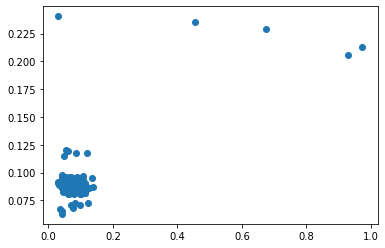

<Figure size 432x288 with 0 Axes>

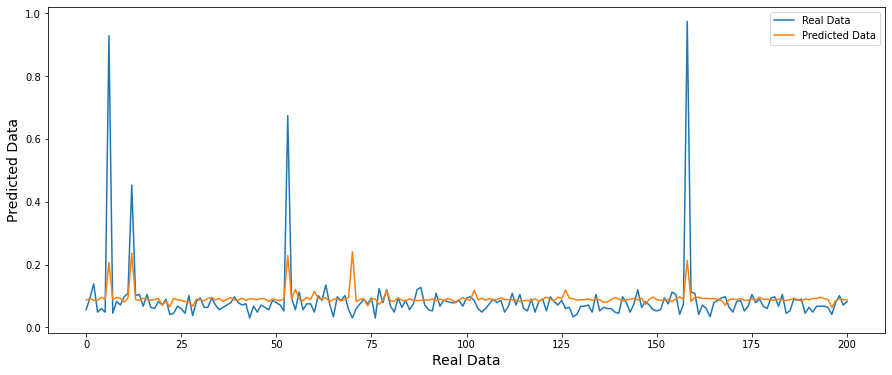

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


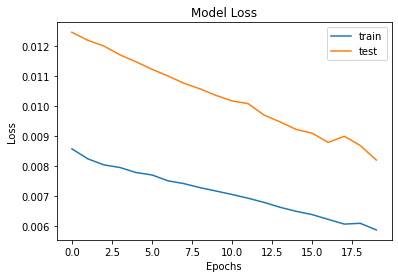

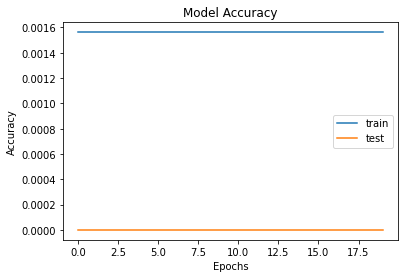

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()

**100 NODES WITH 4 INPUTS AND BLSTM**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSS Experiment with 100 Nodes.csv to MSS Experiment with 100 Nodes (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MSS Experiment with 100 Nodes.csv']))

In [ ]:
Y = np.array([df.iloc[:,12]])

In [ ]:
X1 = np.array([df.iloc[:,11]])
X2 = np.array([df.iloc[:,13]])
X3 = np.array([df.iloc[:,14]])
X4 = np.array([df.iloc[:,15]])

In [ ]:
X = np.concatenate([X1,X2,X3,X4],axis=0)


In [ ]:
X = np.transpose(X)

In [ ]:
Y = np.transpose(Y)

In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [ ]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(20, activation='tanh'), input_shape=(1, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, verbose=2)

predict =model.predict(X_test)

Epoch 1/20
20/20 - 4s - loss: 0.0156 - accuracy: 0.0016 - val_loss: 0.0146 - val_accuracy: 0.0000e+00 - 4s/epoch - 200ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0103 - accuracy: 0.0016 - val_loss: 0.0140 - val_accuracy: 0.0000e+00 - 67ms/epoch - 3ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0095 - accuracy: 0.0016 - val_loss: 0.0135 - val_accuracy: 0.0000e+00 - 74ms/epoch - 4ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0091 - accuracy: 0.0016 - val_loss: 0.0131 - val_accuracy: 0.0000e+00 - 69ms/epoch - 3ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0088 - accuracy: 0.0016 - val_loss: 0.0127 - val_accuracy: 0.0000e+00 - 83ms/epoch - 4ms/step
Epoch 6/20
20/20 - 0s - loss: 0.0085 - accuracy: 0.0016 - val_loss: 0.0123 - val_accuracy: 0.0000e+00 - 85ms/epoch - 4ms/step
Epoch 7/20
20/20 - 0s - loss: 0.0083 - accuracy: 0.0016 - val_loss: 0.0120 - val_accuracy: 0.0000e+00 - 84ms/epoch - 4ms/step
Epoch 8/20
20/20 - 0s - loss: 0.0080 - accuracy: 0.0016 - val_loss: 0.0117 - val_accuracy: 0.0000e+00 - 85ms/epoch - 4

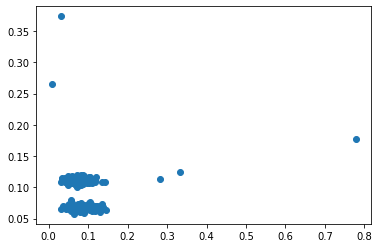

<Figure size 432x288 with 0 Axes>

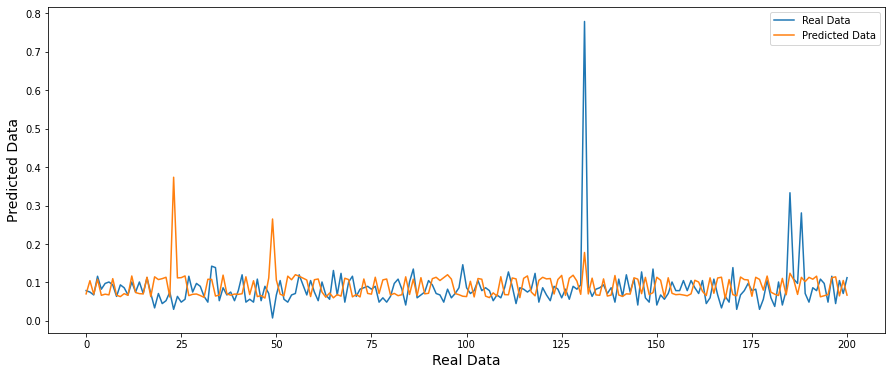

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


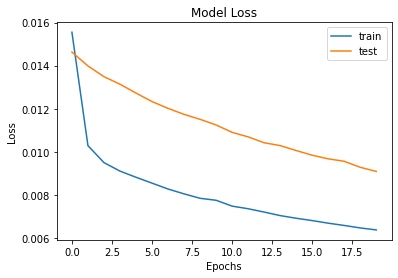

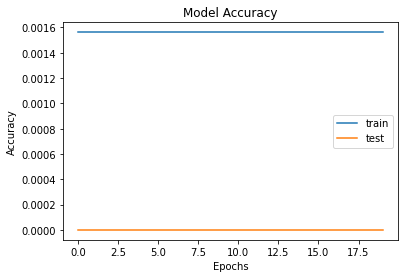

In [ ]:
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)

plt.figure(3)
plt.figure(figsize=(15,6))
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.xlabel('Real Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.legend(["Real Data","Predicted Data"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='centre right')
plt.show(block=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='center right')
plt.show()